In [ ]:
import sklearn
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib


# Data Understanding

In [ ]:
# Membaca dataset
dataset_df = pd.read_csv('train.csv')
datasettest_df = pd.read_csv('test.csv')

In [ ]:
dataset_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
datasettest_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
dataset_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


<ipython-input-19-31b09332662b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_df['SalePrice'], color='g', bins=100, hist_kws={'alpha' : 0.4})


<Axes: xlabel='SalePrice', ylabel='Density'>

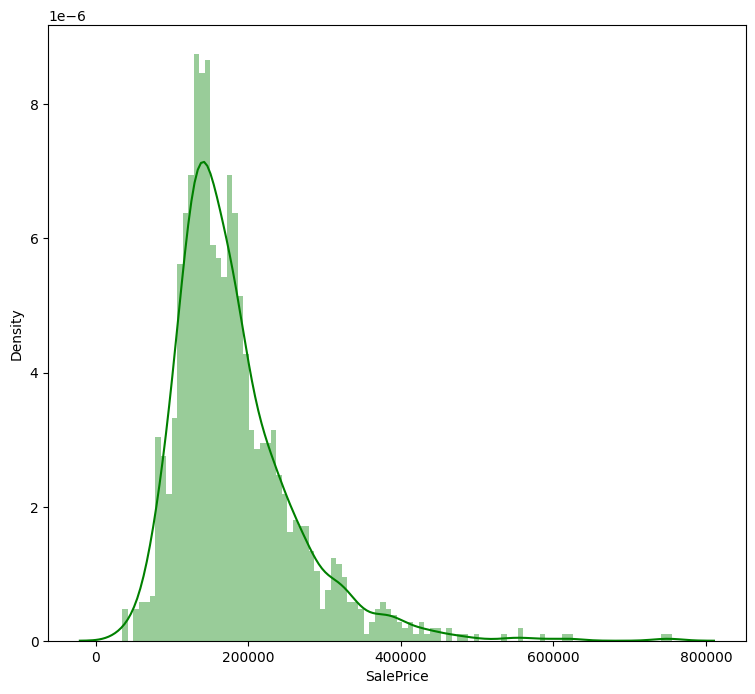

In [ ]:
# Analisis distribusi harga rumah
print(dataset_df['SalePrice'].describe())
plt.figure(figsize=(9,8))
sns.distplot(dataset_df['SalePrice'], color='g', bins=100, hist_kws={'alpha' : 0.4})

Distribusi harga rumah (`SalePrice`) dalam dataset menunjukkan bahwa rata-rata harga rumah adalah 180,921.20 dengan standar deviasi sebesar 79,442.52, yang mencerminkan variasi harga yang cukup besar. Harga rumah terendah tercatat 34,900, sedangkan yang tertinggi mencapai 755,000. Berdasarkan grafik histogram, distribusi harga rumah condong ke kanan (*right-skewed*), menandakan sebagian besar rumah memiliki harga di bawah rata-rata dengan beberapa harga yang sangat tinggi sebagai *outlier*. Analisis persentil menunjukkan bahwa 50% rumah memiliki harga di bawah 163,000 (median), dengan 25% rumah termurah di bawah 129,975 dan 25% rumah termahal di atas 214,000. Kecondongan distribusi ini menunjukkan bahwa transformasi data, seperti transformasi logaritmik, mungkin diperlukan untuk membuat distribusi lebih simetris agar dapat meningkatkan performa model prediksi.

In [ ]:
# Memilih kolom numerik dan menghitung korelasi dengan target
numeric_data = dataset_df.select_dtypes(include=['int64', 'float64'])
corr = numeric_data.corr()
corr_saleprice = corr['SalePrice'].sort_values(ascending=False)
print(f"Korelasi dengan SalePrice:\n{corr_saleprice}")

Korelasi dengan SalePrice:
SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvG

Beberapa fitur memiliki hubungan yang kuat dengan harga rumah. Fitur dengan korelasi tertinggi adalah OverallQual (0.790982), yang menunjukkan bahwa kualitas keseluruhan rumah memiliki dampak signifikan terhadap harga. Fitur lainnya seperti GrLivArea (0.708624), GarageCars (0.640409), dan GarageArea (0.623431) juga memiliki korelasi tinggi, yang berarti luas area tinggal dan fitur terkait garasi memengaruhi harga rumah secara signifikan.

Sebaliknya, beberapa fitur memiliki korelasi negatif atau sangat rendah dengan harga rumah, seperti EnclosedPorch (-0.128578) dan KitchenAbvGr (-0.135907), yang menunjukkan pengaruh kecil atau bahkan negatif terhadap harga rumah. Hasil ini memberikan wawasan penting untuk pemilihan fitur dalam model prediksi, di mana fitur dengan korelasi tinggi dapat diprioritaskan karena memiliki dampak lebih besar terhadap target.

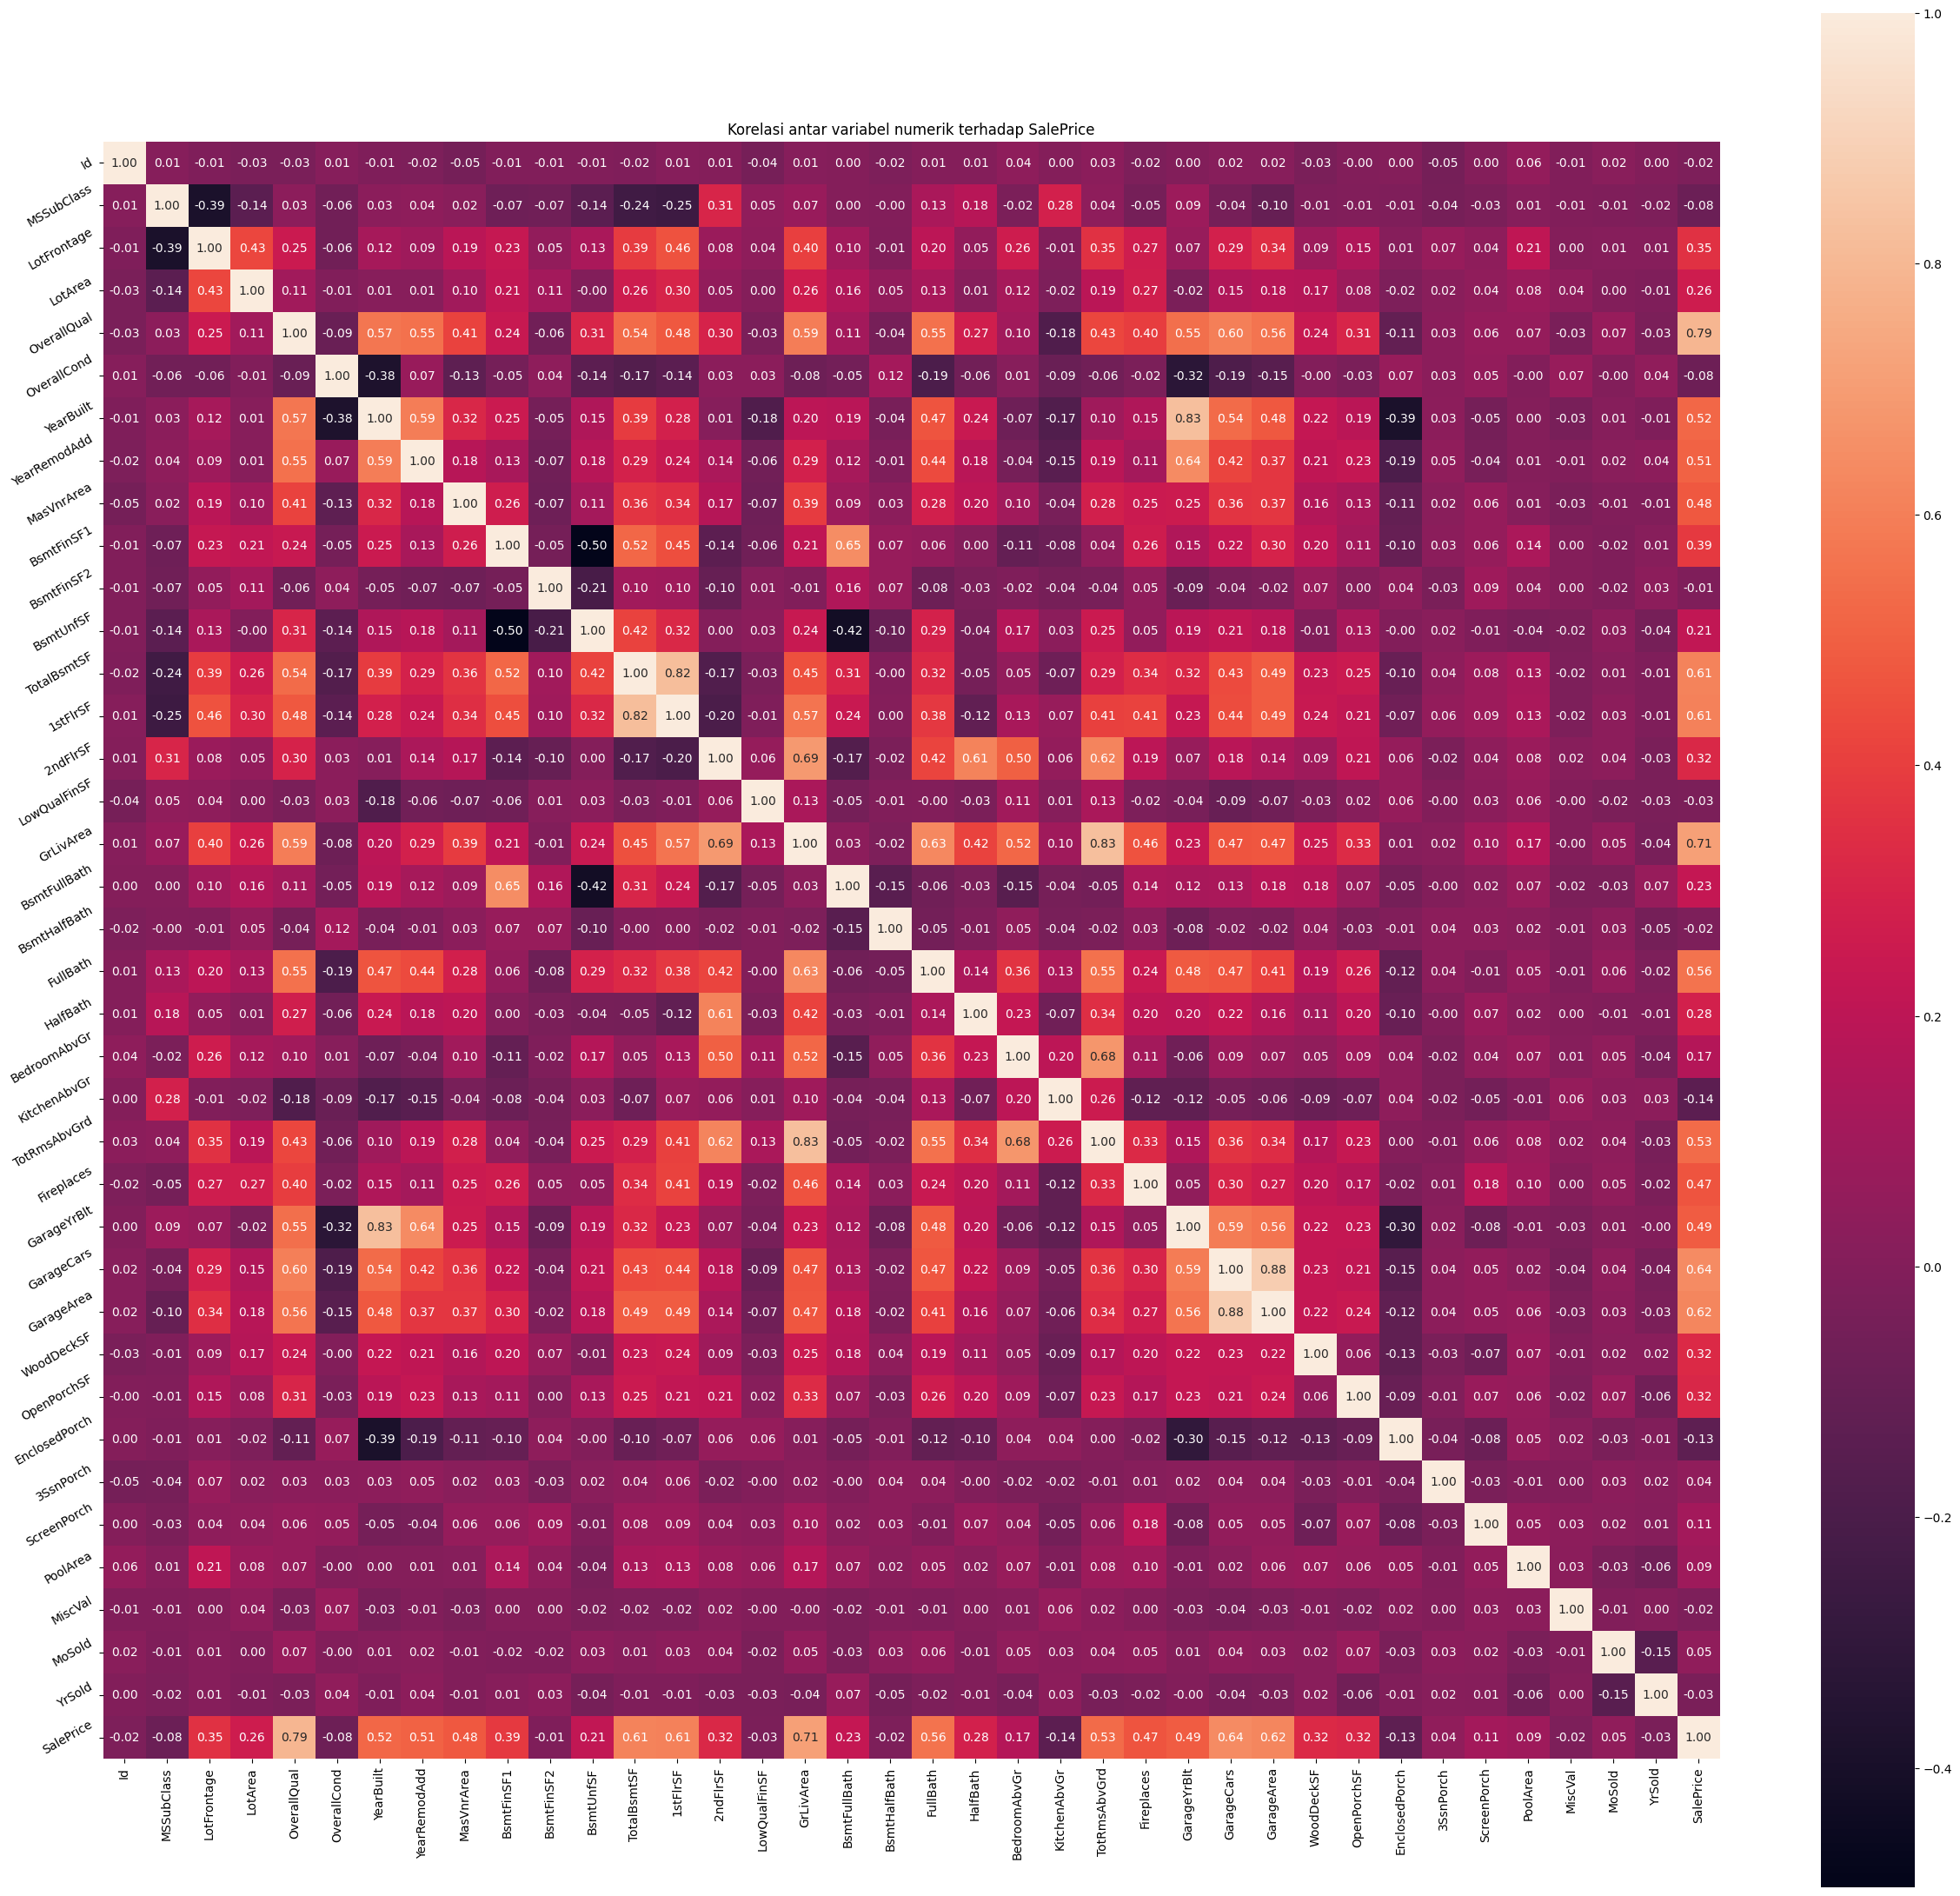

In [ ]:
# Visualisasi korelasi
plt.figure(figsize=(30,28))
plt.title('Korelasi antar variabel numerik terhadap SalePrice')
a = sns.heatmap(corr, square=True, annot=True, fmt='.2f', linecolor='black')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()

Beberapa fitur memiliki hubungan yang signifikan dengan harga rumah. Fitur seperti OverallQual, GrLivArea, GarageArea, dan TotalBsmtSF memiliki korelasi tinggi terhadap SalePrice, menunjukkan bahwa kualitas keseluruhan rumah, luas area tinggal, dan fitur terkait garasi serta ruang bawah tanah sangat memengaruhi harga rumah. Sebaliknya, fitur seperti KitchenAbvGr dan EnclosedPorch memiliki korelasi rendah atau bahkan negatif, yang menunjukkan pengaruh yang kecil atau tidak relevan terhadap harga rumah. Selain itu, ditemukan juga korelasi tinggi antar fitur tertentu, seperti antara GarageCars dan GarageArea, yang menunjukkan adanya multikolinearitas yang perlu diperhatikan untuk menghindari redundansi informasi dalam model. Dengan demikian, fitur dengan korelasi tinggi terhadap SalePrice dapat diprioritaskan dalam proses seleksi fitur untuk meningkatkan performa model prediksi, sementara fitur yang kurang relevan dapat diabaikan untuk mengurangi kompleksitas model.

# Data Preparation

In [ ]:
# Filter fitur dengan korelasi > 0.5
selected_features = corr_saleprice[corr_saleprice.abs() > 0.5].index.tolist()
selected_features.remove('SalePrice')  # Menghapus target dari daftar fitur
df_train_selected = dataset_df[selected_features + ['SalePrice']]

In [ ]:
# Menangani nilai hilang (missing values)
numerical_cols = df_train_selected.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df_train_selected.select_dtypes(include=['object']).columns

In [ ]:
# Imputasi nilai hilang
imputer_median = SimpleImputer(strategy='median')
df_train_selected.loc[:, numerical_cols] = imputer_median.fit_transform(df_train_selected[numerical_cols])

if len(categorical_cols) > 0:
    imputer_most = SimpleImputer(strategy='most_frequent')
    df_train_selected.loc[:, categorical_cols] = imputer_most.fit_transform(df_train_selected[categorical_cols])

<ipython-input-24-bf499b2e0ed6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_selected.loc[:, numerical_cols] = imputer_median.fit_transform(df_train_selected[numerical_cols])


# Modeling

In [ ]:
# Memisahkan fitur dan target
x = df_train_selected.iloc[:, :-1]
y = df_train_selected.iloc[:, -1]

In [ ]:
# Normalisasi fitur dan target
scaler_x = MinMaxScaler()
x_scaled = scaler_x.fit_transform(x)

scaler_y = MinMaxScaler()
y_df = y.to_frame()
y_scaled = scaler_y.fit_transform(y_df)

Dimulai dengan pemilihan fitur berdasarkan korelasi (> 0,5) terhadap target, yaitu "SalePrice", kemudian menghapus kolom target dari daftar fitur. Selanjutnya, nilai hilang pada data ditangani menggunakan imputasi: nilai numerik diisi dengan median, sedangkan nilai kategorikal diisi dengan modus (frekuensi terbanyak). Data kemudian dipisahkan menjadi fitur (X) dan target (y), di mana X berisi semua fitur kecuali kolom target, sedangkan y hanya berisi target "SalePrice". Terakhir, normalisasi dilakukan pada X dan y menggunakan MinMaxScaler untuk memastikan skala data seragam. Proses ini membantu meningkatkan kualitas data untuk analisis lebih lanjut.

In [ ]:
# Split data
x_train, x_valid, y_train, y_valid = train_test_split(x_scaled, y_scaled, test_size=0.2, shuffle=True, random_state=42)

In [ ]:
# Melatih model Random Forest
rf_full = RandomForestRegressor(n_estimators=100, random_state=42)
rf_full.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [ ]:
# Menghitung feature importances
feature_importances = rf_full.feature_importances_

In [ ]:
# Mendapatkan fitur terpenting dan memilih top 10 fitur
features_df = pd.DataFrame({
    'Feature': df_train_selected.columns[:-1],  # Exclude 'SalePrice'
    'Importance': feature_importances
})
top_10_features = features_df.sort_values(by='Importance', ascending=False).head(10)['Feature'].tolist()

In [ ]:
# Filter data untuk hanya menggunakan 10 fitur teratas
x_train_top = pd.DataFrame(x_train, columns=df_train_selected.columns[:-1])[top_10_features].values
x_valid_top = pd.DataFrame(x_valid, columns=df_train_selected.columns[:-1])[top_10_features].values

In [ ]:
# Melatih model Random Forest dengan hanya 10 fitur teratas
rf_top = RandomForestRegressor(n_estimators=100, random_state=42)
rf_top.fit(x_train_top, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [ ]:
# Evaluasi model
y_pred_top = rf_top.predict(x_valid_top)
mse_top = mean_squared_error(y_valid, y_pred_top)
rmse_top = mean_squared_error(y_valid, y_pred_top, squared=False)
mae_top = mean_absolute_error(y_valid, y_pred_top)
r2_top = r2_score(y_valid, y_pred_top)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Proses modeling menggunakan algoritma Random Forest Regressor. Data awal dibagi menjadi data latih dan validasi dengan rasio 80:20. Model Random Forest pertama dilatih menggunakan seluruh fitur, kemudian dihitung feature importance untuk menentukan 10 fitur terpenting. Model baru dibuat dengan hanya menggunakan 10 fitur teratas, dan data dilatih ulang menggunakan fitur-fitur tersebut. Proses evaluasi dilakukan dengan menghitung beberapa metrik, yaitu Mean Squared Error (MSE), Mean Absolute Error (MAE), dan R-squared (R²), untuk menilai kinerja model. Selain itu, terdapat beberapa peringatan terkait format data dan deprecation warning.

# Model Evaluation

In [ ]:
# Menampilkan metrik evaluasi
metrics_df_top = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAE', 'R^2'],
    'Value': [mse_top, rmse_top, mae_top, r2_top]
})
print(metrics_df_top)

  Metric     Value
0    MSE  0.001670
1   RMSE  0.040862
2    MAE  0.026351
3    R^2  0.887124


Hasil evaluasi model *Random Forest Regressor* menggunakan 10 fitur teratas. Tabel menampilkan nilai metrik evaluasi, yaitu:
- MSE (Mean Squared Error): 0.001670
- RMSE (Root Mean Squared Error): 0.040862
- MAE (Mean Absolute Error): 0.026351
- R² (R-squared): 0.887124

Nilai **R²** yang mendekati 1 menunjukkan bahwa model memiliki kemampuan yang baik dalam menjelaskan variasi data, sedangkan nilai kesalahan (MSE, RMSE, MAE) relatif kecil, menunjukkan model cukup akurat dalam memprediksi.

In [ ]:
# Persiapan untuk data test
df_test_selected = datasettest_df[selected_features]  # Pilih fitur yang sudah dipilih sebelumnya

# Pastikan kolom target tidak ada di data test
if 'SalePrice' in df_test_selected.columns:
    df_test_selected = df_test_selected.drop(columns=['SalePrice'])

In [ ]:
# Imputasi kolom numerik
numerical_cols_test = [col for col in numerical_cols if col in df_test_selected.columns]
# Ensure that the columns used for imputation are present in both training and testing datasets
numerical_cols_fit = [col for col in numerical_cols if col != 'SalePrice' and col in df_test_selected.columns]
#Fit the imputer on the training data without 'SalePrice' column
imputer_median = SimpleImputer(strategy='median').fit(df_train_selected[numerical_cols_fit])
df_test_selected.loc[:, numerical_cols_test] = imputer_median.transform(df_test_selected[numerical_cols_test])

# Imputasi kolom kategorikal, jika ada
if len(categorical_cols) > 0:
    categorical_cols_test = [col for col in categorical_cols if col in df_test_selected.columns]
    df_test_selected.loc[:, categorical_cols_test] = imputer_most.transform(df_test_selected[categorical_cols_test])

In [ ]:
# Normalisasi data test
x_test_scaled = pd.DataFrame(scaler_x.transform(df_test_selected), columns=df_test_selected.columns)



In [ ]:
# Pastikan kolom test data cocok dengan fitur training
def ensure_feature_alignment(train_columns, test_df):
    test_aligned = pd.DataFrame(columns=train_columns)
    for col in train_columns:
        if col in test_df.columns:
            test_aligned[col] = test_df[col]
        else:
            test_aligned[col] = 0
    return test_aligned

# Get the columns name from the dataframe before scaling and splitting
# df_train_selected.columns[:-1] gives you the column names of the features used in training
# excluding the last column, which is 'SalePrice'.
x_test_aligned = ensure_feature_alignment(df_train_selected.columns[:-1], x_test_scaled)

In [ ]:
# Prediksi pada data test
y_test_pred_top = rf_top.predict(x_test_aligned)



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [ ]:
# Inverse transformasi hasil prediksi
y_test_pred_reshaped = y_test_pred_top.reshape(-1, 1)
y_test_pred_rescaled = scaler_y.inverse_transform(y_test_pred_reshaped)



In [ ]:
# Simpan hasil prediksi ke file submission
submission = pd.read_csv('sample_submission.csv')
submission['SalePrice'] = y_test_pred_rescaled
submission.to_csv('submission.csv', index=False)

print("Predictions saved to submission.csv")



FileNotFoundError: [Errno 2] No such file or directory: 'sample_submission.csv'

In [ ]:
# Simpan model
joblib.dump(rf_top, 'models.pkl')
joblib.dump(scaler_x, '/content/sample_data/scaler_x.pkl')
joblib.dump(scaler_y, '/content/sample_data/scaler_y.pkl')


['/content/sample_data/scaler_y.pkl']

In [ ]:
joblib.dump(model, 'models.pkl')

['models.pkl']